In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def_df = pd.read_csv('Resources/defunciones_corte18abril.csv', parse_dates=['fec_defuncion'])
def_df.rename(columns={'fec_defuncion':'Date','edad':'Age','sexo':'Gender',
                        'estado':'state','causa':'Covid','causa_registro':'Cause'  
                        },inplace=True)

#max_num_causes = def_df['Cause'].str.split(',').apply(lambda x: len(x)).max()
#causes_cols = [f'Cause{i}' for i in range(1,max_num_causes+1)]
#def_df[causes_cols] = def_df['Cause'].str.split(',',expand = True)
def_df

/home/uriel/.local/share/virtualenvs/cdmx-covid-analysis-OOKfBqux/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Age,Gender,Date,state,Covid,Cause,alcaldia,LugarMuerte,num_consecutivo
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523
...,...,...,...,...,...,...,...,...,...
420522,73.0,Hombre,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,TLAHUAC,NaN,5
420523,75.0,Hombre,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,IZTAPALAPA,NaN,4
420524,0.0,Mujer,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,TLALPAN,NaN,3
420525,55.0,Mujer,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,TLALPAN,NaN,2


In [5]:
def_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420527 entries, 0 to 420526
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Age              420362 non-null  float64       
 1   Gender           420527 non-null  object        
 2   Date             420527 non-null  datetime64[ns]
 3   state            414125 non-null  object        
 4   Covid            420527 non-null  object        
 5   Cause            190998 non-null  object        
 6   alcaldia         277049 non-null  object        
 7   LugarMuerte      168882 non-null  object        
 8   num_consecutivo  420527 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 28.9+ MB


In [6]:
gender_grouped = def_df.groupby('Gender')
gender_df =  pd.DataFrame(gender_grouped['Date'].count())
gender_df.rename(columns={'Date':'count'},inplace=True)
gender_df['Percentage'] = gender_df['count']/gender_df['count'].sum()
gender_df.head()

,count,Percentage
Gender,,
Hombre,231548,0.550614
Indefinido,128,0.000304
Mujer,188851,0.449082


In [7]:
def_df['Month'] = def_df['Date'].dt.month
def_df['Weekday'] = def_df['Date'].dt.weekday
def_df['Day'] = def_df['Date'].dt.dayofyear
def_df['Year'] = def_df['Date'].dt.year
def_df.head()

,Age,Gender,Date,state,Covid,Cause,alcaldia,LugarMuerte,num_consecutivo,Month,Weekday,Day,Year
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527,4,5,100,2021
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526,4,5,100,2021
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525,4,5,100,2021
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524,4,5,100,2021
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523,4,5,100,2021


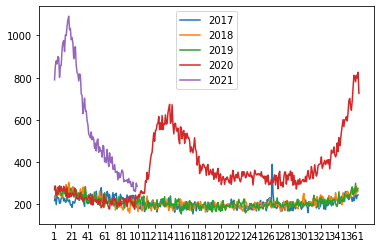

In [167]:
month_grouped = def_df.groupby(['Year','Day']).count().reset_index().set_index('Year')

for index in month_grouped.index.unique():
    temp = month_grouped[['Date','Day']].loc[index]
    plt.plot(temp['Day'],temp['Date'],label = index)
plt.legend()
plt.xticks(range(1,366,20))
plt.savefig('Images/dethsByYear.jpg', bbox_inches='tight')
plt.show()


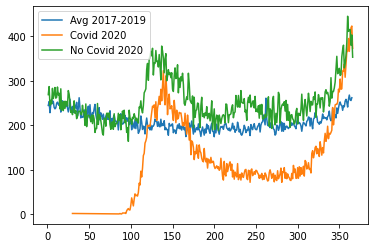

In [156]:
avg_past_year=(month_grouped['Date'].loc[2017].values+month_grouped['Date'].loc[2018].values+month_grouped['Date'].loc[2019].values)/3
covid_2020 = def_df[(def_df['Covid'] != 'Otra')&(def_df['Year'] == 2020)]
no_covid_2020 = def_df[(def_df['Covid'] == 'Otra')&(def_df['Year'] == 2020)]

plt.plot(range(1,366),avg_past_year,label = 'Avg 2017-2019')
plt.plot(covid_2020.groupby(['Day']).count()['Date'], label = 'Covid 2020')
plt.plot(no_covid_2020.groupby(['Day']).count()['Date'], label = 'No Covid 2020')
plt.legend()
plt.savefig('Images/CovidVSnoCovid.jpg')
plt.show()



In [157]:
ncausa_registro = no_covid_2020['Cause'].nunique()
total_entries = len(no_covid_2020)
print(f'Number unique Causes: {ncausa_registro} of total: {total_entries}')

Number unique Causes: 58462 of total: 92652


In [158]:
num_nan_2020 = no_covid_2020.isnull().values.sum()
print(f'Number of entries without Cause: {num_nan_2020}')
no_covid_2020 = no_covid_2020.dropna()

Number of entries without Cause: 35332


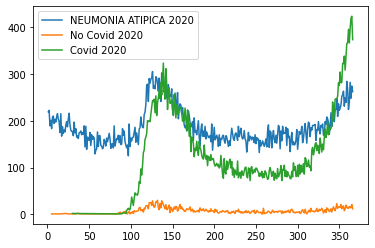

In [164]:
NA_df = no_covid_2020[no_covid_2020['Cause'].str.contains('NEUMONIA ATIPICA')]
plt.plot(no_covid_2020.groupby(['Day']).count()['Date'], label = 'NEUMONIA ATIPICA 2020')
plt.plot(NA_df.groupby(['Day']).count()['Date'], label = 'No Covid 2020')
plt.plot(covid_2020.groupby(['Day']).count()['Date'], label = 'Covid 2020')
plt.legend()
plt.savefig('Images/NeumoniaAtipicaVSall.jpg')
plt.show()